In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn

In [70]:
mall_customer = './Mall_Customers.csv'
data = pd.read_csv(mall_customer)
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [71]:
data = np.array(data) # chuyển dữ liệu sang dạng numpy array
data = np.delete(data, 0, 1) # delete customer id
print(data[5])

['Female' 22 17 76]


In [72]:
def encode_gender(mydata):
  for i in range(len(mydata)):
    if mydata[i, 0] == 'Male':
      mydata[i, 0] = 1
    else:
      mydata[i, 0] = 0
  return mydata 

# encode gender
# 1 to Male
# 0 to Femal
data = encode_gender(data)
# print(data[:5, :])

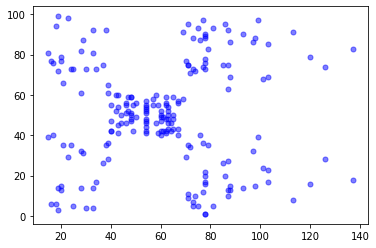

In [73]:
# visualize Annual income and Spending Score
def display_kmean(data):
  x = data[:, 2]
  y = data[:, 3]
  plt.plot(x, y, 'bo', ms=5, alpha=0.5)
  plt.show()

display_kmean(data)

In [74]:
# lấy ra dữ liệu thu nhập hàng năm và chỉ số tiêu dùng
points = data[:, 1:4]

# initial k centroid
# Khởi tạo điểm dữ liệu trung tâm
def kmean_init_centroid(points, k):
  point = list(points[:, 1:3])
  return np.array(rn.sample(point, k))

centroids = kmean_init_centroid(points, 3)
print(centroids)

[[34 17]
 [46 55]
 [19 14]]


In [75]:
# chia dữ liệu thành các cụm
def devide_into_clusters(points, centroids):
  cluster = {}
  for i in range(len(centroids)):
    cluster[i] = []
  for value in points:
    # tính khoảng cách các điểm dữ liệu tới các điểm trung tâm
    distances = [np.linalg.norm(value[1:3] - centroid) for centroid in centroids]
    # phân điểm dữ liệu vào cụm
    clusterI = distances.index(min(distances))
    cluster[clusterI].append(list(value))
  return cluster

clusters = devide_into_clusters(points, centroids)
print(clusters)

{0: [[35, 24, 35], [54, 28, 14], [45, 28, 32], [40, 29, 31], [60, 30, 4], [53, 33, 4], [49, 33, 14], [42, 34, 17], [36, 37, 26], [65, 38, 35], [48, 39, 36], [49, 39, 28], [59, 71, 11], [47, 71, 9], [20, 73, 5], [44, 73, 7], [19, 74, 10], [57, 75, 5], [25, 77, 12], [34, 78, 22], [43, 78, 17], [44, 78, 20], [47, 78, 16], [37, 78, 1], [34, 78, 1], [19, 81, 5], [42, 86, 20], [40, 87, 13], [36, 87, 10], [52, 88, 13], [58, 88, 15], [59, 93, 14], [46, 98, 15], [33, 113, 8]], 1: [[21, 15, 81], [23, 16, 77], [22, 17, 76], [23, 18, 94], [30, 19, 72], [35, 19, 99], [24, 20, 77], [22, 20, 79], [20, 21, 66], [35, 23, 98], [25, 24, 73], [31, 25, 73], [29, 28, 82], [35, 28, 61], [23, 29, 87], [21, 30, 73], [18, 33, 92], [21, 33, 81], [30, 34, 73], [20, 37, 75], [24, 38, 92], [31, 39, 61], [24, 39, 65], [50, 40, 55], [27, 40, 47], [29, 40, 42], [31, 40, 42], [49, 42, 52], [33, 42, 60], [31, 43, 54], [59, 43, 60], [50, 43, 45], [47, 43, 41], [51, 44, 50], [69, 44, 46], [27, 46, 51], [53, 46, 46], [70, 

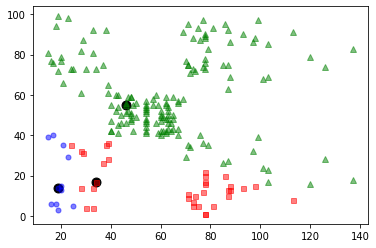

In [77]:
cluster1 = np.array(clusters[0])
cluster2 = np.array(clusters[1])
cluster3 = np.array(clusters[2])
plt.plot(cluster1[:, 1], cluster1[:, 2], 'rs', ms=5, alpha=.5)
plt.plot(cluster2[:, 1], cluster2[:, 2], 'g^', ms=6, alpha=.5)
plt.plot(cluster3[:, 1], cluster3[:, 2], 'bo', ms=5, alpha=.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=80)
plt.show()

In [78]:
# Update centroids
def update_centroids(clusters):
  # cập nhật lại điểm trung tâm
  centroids = np.array([list(np.mean(clusters[key], axis=0)) for key in clusters])
  centroids = centroids[:, 1:3]
  return centroids

centroids = update_centroids(clusters)
print(centroids)

[[64.55882353 15.44117647]
 [62.60645161 60.06451613]
 [19.36363636 18.63636364]]


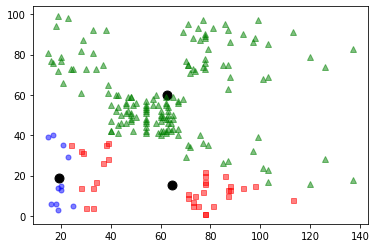

In [79]:
plt.plot(cluster1[:, 1], cluster1[:, 2], 'rs', ms=5, alpha=.5)
plt.plot(cluster2[:, 1], cluster2[:, 2], 'g^', ms=6, alpha=.5)
plt.plot(cluster3[:, 1], cluster3[:, 2], 'bo', ms=5, alpha=.5)
# centroids updated
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=80)
plt.show()

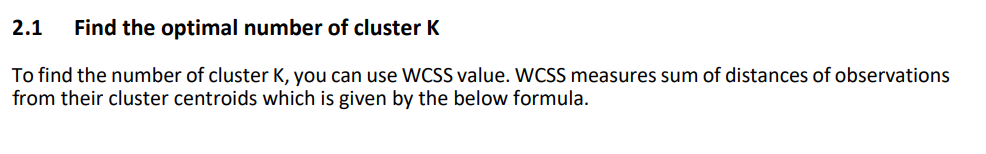

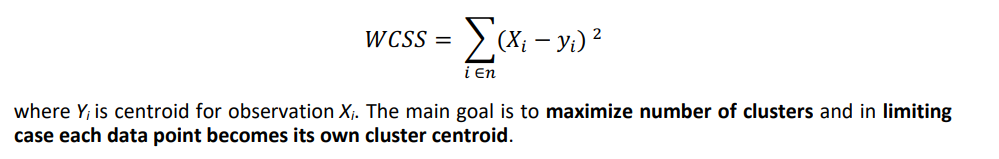

In [80]:
# Optimal k cluster using value WCSS
# limit max = 10 clusters
max_k = 11
def wcss_cluster(points, max_k):
  WCSS = []
  for k in range(1, max_k):
    # Khởi tạo điểm trung tâm
    centroids = kmean_init_centroid(points, k)
    for i in range(10):
      # phân cụm lại các điểm dữ liệu
      clusters = devide_into_clusters(points, centroids)
      # cập nhật lại điểm trung tâm
      new_centroids = update_centroids(clusters)
      # điều kiện dừng khi điểm trung tâm không đổi
      if (centroids == new_centroids).all():
        break
      centroids = new_centroids
    k_ = [clusters[k] for k in clusters]
    distances = 0
    for i in range(k):
      # tổng bình phương khoảng cách WCSS
      distances += np.sum(np.square(np.array(k_[i])[:, 1:3] - centroids[i]))
    WCSS.append(distances)
  return WCSS

In [81]:
WCSS = wcss_cluster(points, max_k)

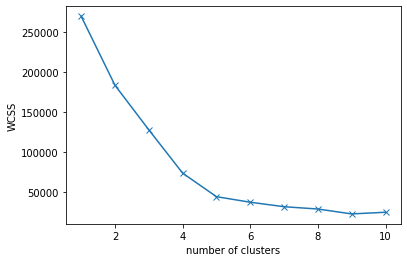

In [82]:
plt.plot(range(1, max_k), WCSS, marker='x')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

***từ đồ thị ta thấy số cụm hợp lý k = 5 ***

In [83]:
# visualize data points with k cluster
def kmean_clustering(points, optimal_k):
  i = 0
  centroids = kmean_init_centroid(points, optimal_k)
  for k in range(10):
    clusters = devide_into_clusters(points, centroids)
    # clusters = np.array([clusters[k] for k in clusters])
    new_centroids = update_centroids(clusters)
    if (centroids == new_centroids).all():
      break
    centroids = new_centroids
    i += 1
  for key in clusters:
    plt.scatter(np.array(clusters[key])[:, 1], np.array(clusters[key])[:, 2], s=20, alpha=.6)
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score')
  plt.legend([key for key in clusters])
  plt.show()
  print('Clusters has coverged at ', i)
  cluster3d = [cluster for cluster in clusters.values()]
  for key, cluster in clusters.items():
    cluster = np.array(cluster)
    cluster = cluster[cluster[:, 0].argsort()]
    print('cluster {}'.format(key), cluster)
  fig = plt.figure(figsize=(10,7))
  ax = plt.axes(projection='3d')
  for cluster in cluster3d:
    cluster = np.array(cluster)
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2])
  ax.set_xlabel('Age', fontweight ='bold')
  ax.set_ylabel('Annual Income', fontweight ='bold')
  ax.set_zlabel('Spending Score', fontweight ='bold')

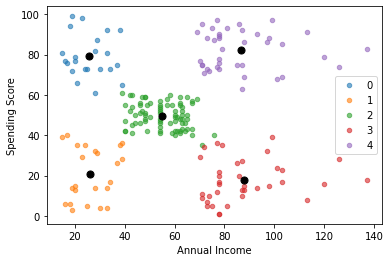

Clusters has coverged at  4
cluster 0 [[18 33 92]
 [20 37 75]
 [20 21 66]
 [21 15 81]
 [21 33 81]
 [21 30 73]
 [22 17 76]
 [22 20 79]
 [23 16 77]
 [23 18 94]
 [23 29 87]
 [24 39 65]
 [24 38 92]
 [24 20 77]
 [25 24 73]
 [29 28 82]
 [30 34 73]
 [30 19 72]
 [31 25 73]
 [35 28 61]
 [35 23 98]
 [35 19 99]]
cluster 1 [[19 15 39]
 [20 16  6]
 [31 17 40]
 [35 18  6]
 [35 21 35]
 [35 24 35]
 [36 37 26]
 [37 20 13]
 [40 29 31]
 [42 34 17]
 [45 28 32]
 [46 25  5]
 [48 39 36]
 [49 33 14]
 [49 39 28]
 [52 23 29]
 [53 33  4]
 [54 28 14]
 [58 20 15]
 [60 30  4]
 [64 19  3]
 [65 38 35]
 [67 19 14]]
cluster 2 [[18 48 59]
 [18 59 41]
 [18 65 48]
 [19 46 55]
 [19 65 50]
 [19 64 46]
 [19 63 54]
 [19 48 59]
 [20 61 49]
 [21 62 42]
 [21 54 57]
 [22 57 55]
 [23 62 41]
 [23 54 52]
 [24 60 52]
 [26 54 54]
 [26 62 55]
 [27 60 50]
 [27 46 51]
 [27 40 47]
 [27 67 56]
 [28 76 40]
 [29 40 42]
 [31 39 61]
 [31 43 54]
 [31 40 42]
 [32 48 47]
 [32 60 42]
 [33 42 60]
 [34 58 60]
 [38 67 40]
 [38 54 55]
 [38 64 42]
 [40

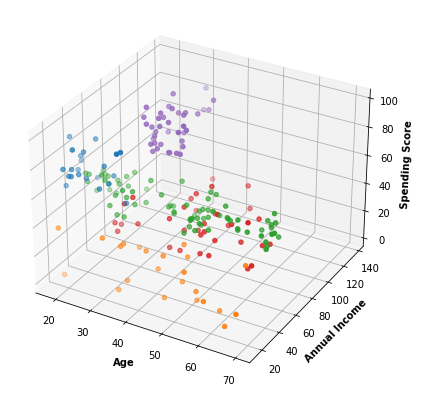

In [85]:
# visualize with optimal k = 5
kmean_clustering(points, 5)

*cluster number: [age, annual_income, Spending_Score]*